# 😶 데이터 가져오기

as_frame 옵션을 통해 데이터를 데이터 프레임형식으로 가져올지 말지를 결정할 수 있습니다.

데이터가 어떻게 되어있는지 보기 편하게 데이터 프레임 형식으로 본 후 np어레이 형식으로 바꾸려 합니다.

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
from pandas import DataFrame
import numpy as np
#df 형식으로 자료를 불러올 것인지 as_frame 인자를 통해 결정할 수 있다. default값이 False이므로 아무것도 입력하지 않으면 자료들이
# ndarray형식으로 가져와진다.
diabets = load_diabetes(as_frame=1)

변수 X,y에 당뇨병 데이터의 feature 와 label을 각각 할당해 줍니다.

In [2]:
df_X = diabets.data
df_y = diabets.target

In [3]:
print(diabets.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
type(df_X),type(df_y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

데이터의 type을 확인해 본 결과.
X는 dataframe y는 Series 자료 형식이네요. Series 형식은 dict형식과 비슷하다 합니다.

In [5]:
df_X.shape,df_y.shape

((442, 10), (442,))

df_X = 442개 데이터, 10개 columns

df_y = 442개 데이터의 배열.

In [6]:
df_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [7]:
df_y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

범주형 데이터를 연속형 데이터처럼 변환해야 할 줄 알았으나 데이터를 살펴보니 그럴 필요가 없었다.

# 😶 모델에 입력할 데이터 X,y 준비하기

to_numpy() 함수를 사용해서 X,y를 np array형식으로 변경.

In [8]:
X = df_X.to_numpy()
y = df_y.to_numpy()

In [9]:
X.shape

(442, 10)

In [10]:
y.shape

(442,)

# 😶훈련용 데이터와 Test용 데이터로 분리.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=3489)

In [12]:
#W와 b의 초기값 설정
W = np.random.rand(10)
b = np.random.rand()  

In [13]:
print(W)
print(W.shape)
print(b)

[0.79049166 0.695522   0.80008303 0.13959833 0.23735726 0.5514559
 0.06025873 0.71540567 0.15266199 0.37687795]
(10,)
0.7360342767821936


# 😶모델 준비하기

In [14]:
#벡터의 내적과 브로드캐스트 연산을 이용하여 모델을 만든다.
# dot 연산은 1차원 배열과 n*m차원의 벡터의 연산을 지원한다.
def model(X,W,b):
    pred_y = X.dot(W)+b
    return pred_y

모델에 X,W,b를 넣어서 계산해본 결과 생각한 대로 (442,) 배열이 나왔다.

이대로 써도 됨

# 😶손실함수 loss 정의하기

In [15]:
# y에 모델링한 결과를 할당.
# pred_y = model(X,W,b)

# 결과의 shape을 출력 (검증)
# print('shape of predicted y:', pred_y.shape)


# 실제 y와 pred_y 간의 오차를 정의
# er_t = y-pred_y 


# 결과의 shape을 출력 (검증)
# print('shape of error:', er_t.shape)
# sqer_t = er_t**2


# MSE 값 출력 (검증)
# mse_t = sqer_t.mean()
# print('shape of squared error:', sqer_t.shape)
# print('Value of MSE:', mse_t)


# Root Mean Squre Error 구하는 함수를 정의
def RMSE(y_actual,y_predict):
    er = y_actual-y_predict
    sqer = er**2
    #sqer의 평균을 구해 제곱근을 구하여 rmse에 할당.
    rmse = np.sqrt(sqer.mean())
    return rmse

shape of predicted y: (442,)
shape of error: (442,)
shape of squared error: (442,)
Value of MSE: 28841.051641588536


In [16]:
# RMSE값 출력(검증)
# test_rmse_t = RMSE(y,pred_y)
# print('Value of RMSE:',test_rmse_t)

Value of RMSE: 169.82653397390095


In [17]:
# 손실함수 Loss를 정의
def loss(x,w,b,y):
    '모델에서 예측한 pred_y와 실제 y의 error을 통해 RMSE 값을 반환'
    pred_y = model(x,w,b)
    l = RMSE(y,pred_y)
    return l

# 😶기울기를 구하는 gradient 함수 구현하기

RMSE를 사용한 Loss에 대한 Gradient는 다음 공식을 구현

$∂L \over \partialω_i$ =  $1 \over N \times RMSE$$ \sum_{i=1}^N x_i \left\{y_{i,pred}-y_{i,true} \right\}$

$∂L \over \partial b$ = $1 \over N \times RMSE $$ \sum_{i=1}^N\left\{y_{i,pred}-y_{i,true} \right\}$



gradient는 특정한 $ω_i$ 와 b에 대해 미분한 것이므로 $∂L \over \partialω_i$ 공식을 표기할 때 밑첨자 때문에 혼동을 주며, 직관적인 이해도 쉽지 않다.

따라서 다음을 제안한다.

$∂L \over \partialω_k$ =  $1 \over N \times RMSE$$ \sum_{i=1}^N x^k_i \left\{y_{i,pred}-y_{i,true} \right\}$

$ω_k$ = k번째의 가중치

$x^k_i$ = k 번째의 feature의 i번째 데이터

N = 데이터의 총 개수

RMSE = 실제 데이터와 모델의 RMSE값

$y_{i,true}$ = i번째 label 데이터

$y_{i,pred}$ = i번째 predicted 데이터

In [18]:
def gradient(X, W, b, y):
    pred_y = model(X, W, b)
    #label데이터의 총 개수를 N으로 지정.(헷갈림 방지)
    N = len(y)
    rmse = RMSE(y,pred_y)    
    # X의 shape은 (442,10) er의 shape은 (442,) 벡터의 내적을 수행할 수 없으므로 전치행렬 메서드로 shape을 (10,442)로 바꿔준 후 계산.
    dW =1/(rmse*N)*X.T.dot(pred_y - y)
    # b의 gradient 계산
    db = (1/rmse) * (pred_y - y).mean()
    return dW, db

In [19]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("shape of dW :",W.shape)
print("db:", db)

dW: [-0.00403123 -0.0009109  -0.01262508 -0.00950281 -0.00454904 -0.00372878
  0.0084965  -0.00925497 -0.01218125 -0.00822648]
shape of dW : (10,)
db: -0.8914828934174714


# 😶모델 학습하기

In [20]:
# 학습률 후보 생성
LEARNING_RATE_for_test =[0.1,1,10,15,50,75,100,150,500,750,1000]

In [21]:
# def Training(X, W, b, y):
#     결과 입력할 빈 리스트 생성
#     losses_t = []
#     #LEARNING_RATE_for_test 개수만큼 LEARNING_RATE 달라지게 1000회 학습
#     for a in LEARNING_RATE_for_test:
#         for i in range(1, 1001):
#             dW, db = gradient(X, W, b, y)
#             W -= a * dW
#             b -= a * db
#             L = loss(X, W, b, y)
#             if i == 1000:
#                 losses_t.append(L)
#     return losses_t
#     print(losses_t)        

In [22]:
# LEARNING_RATE 별로 학습된 모델의 Loss를 Dataframe형식으로 생성.
# list_of_loss = Training(X_train, W, b, y_train)
# Loss_df = pd.DataFrame({"LR_t Value":LEARNING_RATE_for_test,"Loss Value":list_of_loss})
# Loss_df

LEARNING RATE(학습률)은 대략적으로 15~100 사이의 수이면 성능에 큰 차이가 없음을 알았다. 

75이상의 LEARNING RATE에서 소수점 3자리수의 Loss값이 줄어들지만 아주 작은 차이이다.

따라서 이를 토대로 LEARNING RATE를 결정할 것이다.

In [23]:
# 학습률 한 개에 대해서 학습.
LEARNING_RATE = 18.2233
print(b)

0.7360342767821936


In [24]:
losses = []
def Training_for_plot(X1, W1, k1, y1):
    for i in range(1, 1001):
        dW, db = gradient(X1, W1, k1, y1)
        W1 -= LEARNING_RATE * dW
        k1 -= LEARNING_RATE * db
        L = loss(X1, W1, k1, y1)
        losses.append(L)
        if i % 10 == 0:
            #Training이 10회 단위로 진행 될 때마다 Loss출력
            print('Iteration %d : b %0.4f' % (i, k1))
    return k1

In [25]:
import matplotlib.pyplot as plt
b = Training_for_plot(X_train, W, b, y_train)
print(b)

Iteration 10 : b 126.5235
Iteration 20 : b 150.9504
Iteration 30 : b 152.7241
Iteration 40 : b 152.8422
Iteration 50 : b 152.8474
Iteration 60 : b 152.8451
Iteration 70 : b 152.8425
Iteration 80 : b 152.8399
Iteration 90 : b 152.8374
Iteration 100 : b 152.8350
Iteration 110 : b 152.8327
Iteration 120 : b 152.8305
Iteration 130 : b 152.8283
Iteration 140 : b 152.8263
Iteration 150 : b 152.8243
Iteration 160 : b 152.8224
Iteration 170 : b 152.8206
Iteration 180 : b 152.8189
Iteration 190 : b 152.8173
Iteration 200 : b 152.8157
Iteration 210 : b 152.8143
Iteration 220 : b 152.8129
Iteration 230 : b 152.8116
Iteration 240 : b 152.8104
Iteration 250 : b 152.8092
Iteration 260 : b 152.8081
Iteration 270 : b 152.8071
Iteration 280 : b 152.8062
Iteration 290 : b 152.8053
Iteration 300 : b 152.8046
Iteration 310 : b 152.8038
Iteration 320 : b 152.8032
Iteration 330 : b 152.8026
Iteration 340 : b 152.8021
Iteration 350 : b 152.8016
Iteration 360 : b 152.8013
Iteration 370 : b 152.8009
Iteration 

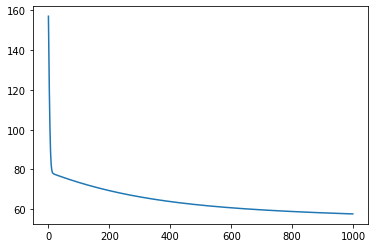

In [26]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [27]:
print(b)

152.85333190524892


# 😶하이퍼 파라미터인 학습률 설정하기

In [28]:
LEARNING_RATE = 18.1228

학습률은 100보다는 아주 약간 작은 수를 아무렇게나 입력하여 정했다.

# 😶test 데이터에 대한 성능 확인하기

In [29]:
prediction = model(X_test, W, b)
rmse_t1 = loss(X_test, W, b,y_test)
rmse_t1

51.210605465595265

# 😶Visualization

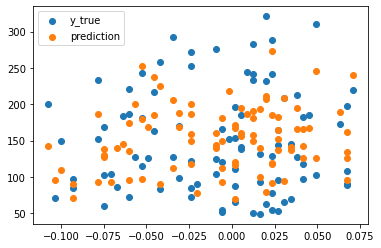

In [30]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.legend(["y_true","prediction"])
plt.show()

예측값과 실제값의 모양은 비슷하지만 알 수 없는 이유로 실제값과의 off-set이 오차를 키운것 같다.

그렇다면 off-set에 가장 가까운 b값을 조정한다면 실제값과 예측값이 잘 맞아 떨어질 것 같다.

In [31]:
# # b값을 off-set값에 비슷하게 조정
# prediction = model(X_test, W, 135)
# rmse_t1 = loss(X_test, W, 135,y_test)
# rmse_t1

In [32]:
# # b값을 off-set값에 비슷하게 조정
# prediction = model(X_test, W, 140)
# rmse_t1 = loss(X_test, W, 140,y_test)
# rmse_t1

In [33]:
# # b값을 off-set값에 비슷하게 조정
# prediction = model(X_test, W, 145)
# rmse_t1 = loss(X_test, W, 145,y_test)
# rmse_t1

In [34]:
# # b값을 off-set값에 비슷하게 조정
# prediction = model(X_test, W, 150)
# rmse_t1 = loss(X_test, W, 150,y_test)
# rmse_t1

In [35]:
# # b값을 off-set값에 비슷하게 조정
# prediction = model(X_test, W, 155)
# rmse_t1 = loss(X_test, W, 155,y_test)
# rmse_t1

일단 155를 넣고 돌린 결과를 plotting 해보면

In [36]:
# plt.scatter(X_test[:, 0], y_test)
# plt.scatter(X_test[:, 0], prediction)
# plt.legend(["y_true","prediction"])
# plt.show()

산점도 그래프가 잘 맞아 떨어진다. 왜 off-set이 나왔는지는 모르겠다.

과적합인지 아니면 학습률을 잘못 설정해서인지..